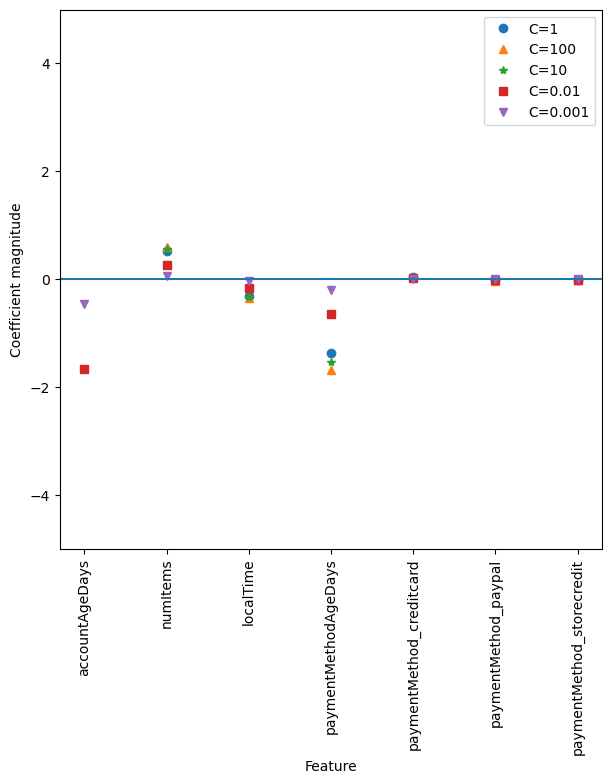

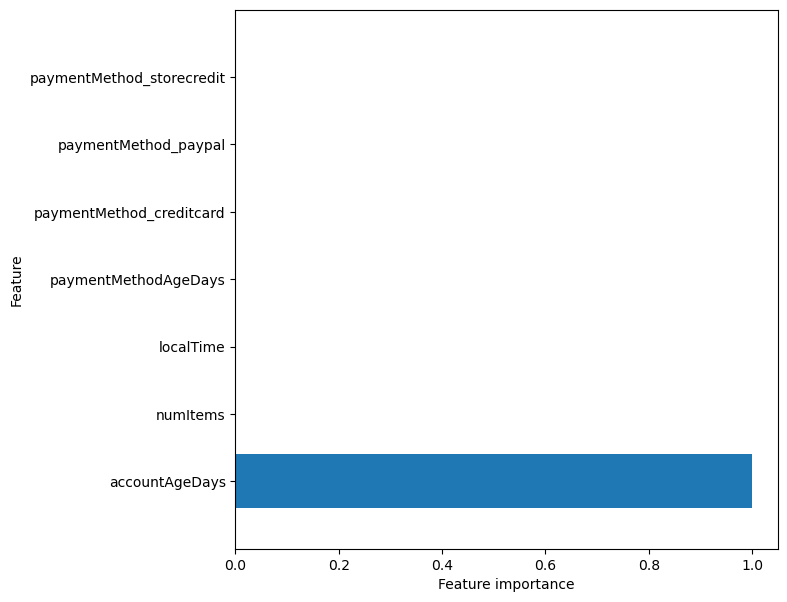

In [2]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
data = pd.read_csv('payment_fraud.csv')

# Convert categorical variable into dummy variables
data = pd.get_dummies(data, columns=['paymentMethod'])

# Splitting the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('label', axis=1), data['label'], test_size=0.33, stratify=data['label'], random_state=17
)

# Initialize Logistic Regression models with different C parameters
logreg1 = LogisticRegression(C=1, max_iter=10000, random_state=42)
logreg100 = LogisticRegression(C=100, max_iter=10000, random_state=42)
logreg10 = LogisticRegression(C=10, max_iter=10000, random_state=42)
logreg001 = LogisticRegression(C=0.01, max_iter=10000, random_state=42)
logreg0001 = LogisticRegression(C=0.001, max_iter=10000, random_state=42)

# Fit the models
logreg1.fit(X_train, y_train)
logreg100.fit(X_train, y_train)
logreg10.fit(X_train, y_train)
logreg001.fit(X_train, y_train)
logreg0001.fit(X_train, y_train)

# Plotting the graph for coefficients
plt.subplots(figsize=(7, 7), dpi=100)
plt.plot(logreg1.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg10.coef_.T, '*', label="C=10")
plt.plot(logreg001.coef_.T, 's', label="C=0.01")
plt.plot(logreg0001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.show()

# Decision tree learning algorithm
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

# Plotting the decision tree for feature importance
plt.subplots(figsize=(7, 7), dpi=100)
n_features = X_train.shape[1]
plt.barh(np.arange(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.show()